In [1]:
from braincoder.models import GaussianPointPRF2D
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

In [2]:
parameters = pd.DataFrame({'mu_x':1.17, 'mu_y':2.6, 'sd_x':18.0, 'sd_y':25.0, 'amplitude':1.0, 'baseline':0.0, 'rho':-.75}, index=[0])

In [3]:
import numpy as np

x = np.linspace(np.log(10), np.log(40), 100)
y = np.linspace(np.log(10), np.log(40), 100)
paradigm_x, paradigm_y = np.meshgrid(x, y)

# Stack into a 10,000 x 2 array
paradigm = np.column_stack((paradigm_x.ravel(), paradigm_y.ravel()))

In [5]:
model = GaussianPointPRF2D(parameters=parameters, correlated_response=True)

['mu_x', 'mu_y', 'sd_x', 'sd_y', 'rho', 'amplitude', 'baseline']

In [11]:
pars1 = model._transform_parameters_backward(parameters[model.parameter_labels].values)

pars2 = model._transform_parameters_forward(pars1)
pars2

<tf.Tensor: shape=(1, 7), dtype=float64, numpy=array([[ 1.17,  2.6 , 18.  , 25.  , -0.75,  1.  ,  0.  ]])>

In [14]:
parameters[model.parameter_labels]

,mu_x,mu_y,sd_x,sd_y,rho,amplitude,baseline
0,1.17,2.6,18.0,25.0,-0.75,1.0,0.0


In [21]:
paradigm

array([[2.30258509, 2.30258509],
       [2.31658807, 2.30258509],
       [2.33059104, 2.30258509],
       ...,
       [3.66087351, 3.68887945],
       [3.67487648, 3.68887945],
       [3.68887945, 3.68887945]])

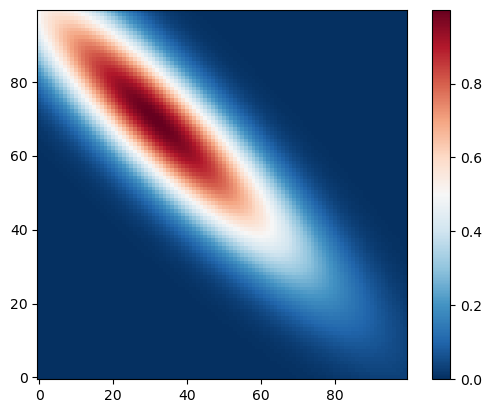

In [50]:
x = np.linspace(np.log(1), np.log(40), 100)
y = np.linspace(np.log(1), np.log(40), 100)
paradigm_x, paradigm_y = np.meshgrid(x, y)
paradigm = np.column_stack((paradigm_x.ravel(), paradigm_y.ravel()))

parameters = pd.DataFrame({'mu_x':1.17, 'mu_y':2.6, 'sd_x':1.0, 'sd_y':1.0, 'amplitude':1.0, 'baseline':0.0,
                           'rho':-.9}, index=[0])
pred = model.predict(paradigm, parameters=parameters)

plt.imshow(pred.values.reshape(100, 100), origin='lower', cmap='RdBu_r')

plt.colorbar()

In [87]:
data = model.simulate(paradigm, noise=0.5)

In [88]:
from braincoder.optimize import ParameterFitter

In [89]:
mu_x = np.linspace(-10, 10, 10)
mu_y = np.linspace(-10, 10, 10)
sd_x = np.linspace(1, 10, 10)
sd_y = np.linspace(1, 10, 10)
rho = [0.0]

amplitude = [1.]
baseline = [0.0]


fitter = ParameterFitter(model, data, paradigm, )


pars_grid = fitter.fit_grid(mu_x, mu_y, sd_x, sd_y, rho, amplitude, baseline, use_correlation_cost=True)

pars_grid

Working with chunk size of 66666
Using correlation cost!


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.04it/s]


,mu_x,mu_y,sd_x,sd_y,rho,amplitude,baseline
source,,,,,,,
0,3.333333,1.111111,9.0,10.0,0.0,1.0,0.0


In [90]:
pars_gd = fitter.fit(init_pars=pars_grid)

Number of problematic voxels (mask): 0
Number of voxels remaining (mask): 1


Current R2: 0.08636/Best R2: 0.08636: 100%|██████████| 1000/1000 [00:10<00:00, 95.21it/s]


In [91]:
pars_gd

parameter,mu_x,mu_y,sd_x,sd_y,rho,amplitude,baseline
source,,,,,,,
0,1.612534,1.918617,10.596616,13.528318,-0.620105,0.689427,0.345501


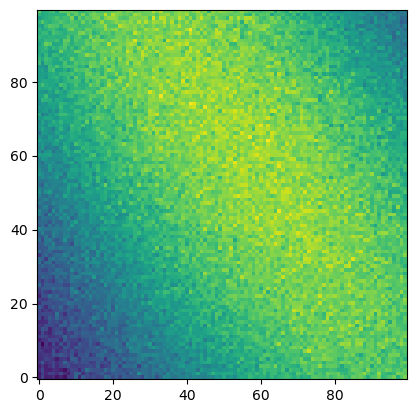

In [92]:
plt.imshow(model.simulate(paradigm, noise=0.05).values.reshape(100, 100), origin='lower')